In [2]:
using Random
using CSV
using DataFrames
using StatsBase
using Dagitty
using Turing
using StatsPlots
using StatisticalRethinking
using StatisticalRethinkingPlots
using Logging

default(labels=false)
Logging.disable_logging(Logging.Warn);

# Easy problems

* 5E1: 2 and 4
* 5E2: mu = a + pA * animals + pP * plants

* 5E3: we need three models: with each predictor and both variables included in the model.

* 5E4: 2, 4 and 5

# Medium problems

## 5M1

In [3]:
Random.seed!(1)
N = 1000
a = rand(Normal(2), N)
b = rand(MvNormal(a .+ 10, 0.1))
c = rand(MvNormal(a .- 20, 0.2))
d = DataFrame(:a => a, :b => b, :c => c);

In [4]:
@model function model_m5m1_bc(B, C)
    a ~ Normal()
    pB ~ Normal()
    μ = @. a + pB * B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_bc = DataFrame(sample(model_m5m1_bc(d.b, d.c), NUTS(), 1000))
precis(m5m1_bc)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │     mean     std      5.5%       50%     94.5%   histogram │
├───────┼────────────────────────────────────────────────────────────┤
│     a │ -29.6537  0.0859  -29.7894  -29.6513  -29.5188  ▁▁▄▆██▆▃▂▁ │
│    pB │   0.9717  0.0072    0.9602    0.9715    0.9831   ▁▂▄██▆▃▁▁ │
│     σ │   0.2275  0.0052     0.219    0.2273     0.236     ▁▂▆█▅▂▁ │
└───────┴────────────────────────────────────────────────────────────┘


In [5]:
@model function model_m5m1_ac(A, C)
    a ~ Normal()
    pA ~ Normal()
    μ = @. a + pA * A
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_ac = DataFrame(sample(model_m5m1_ac(d.a, d.c), NUTS(), 1000))
precis(m5m1_ac)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │     mean     std      5.5%       50%     94.5%   histogram │
├───────┼────────────────────────────────────────────────────────────┤
│     a │ -19.9947  0.0149  -20.0178  -19.9949  -19.9713  ▁▁▁▄██▇▅▂▁ │
│    pA │   1.0003  0.0066    0.9903    1.0003    1.0108   ▁▁▅██▅▂▁▁ │
│     σ │   0.2074  0.0047    0.2003    0.2072    0.2149     ▁▁▆█▅▁▁ │
└───────┴────────────────────────────────────────────────────────────┘


In [6]:
@model function model_m5m1_abc(A, B, C)
    a ~ Normal()
    pA ~ Normal()
    pB ~ Normal()
    μ = @. a + pA*A + pB*B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_abc = DataFrame(sample(model_m5m1_abc(d.a, d.b, d.c), NUTS(), 1000))
precis(m5m1_abc)

┌───────┬──────────────────────────────────────────────────────────┐
│ param │     mean     std      5.5%       50%    94.5%  histogram │
├───────┼──────────────────────────────────────────────────────────┤
│     a │ -14.7602  0.5741  -15.6385  -14.7792  -13.772   ▁▃▇█▆▃▁▁ │
│    pA │   1.5264  0.0576    1.4371    1.5239   1.6221   ▁▂▇█▆▃▁▁ │
│    pB │   -0.524  0.0574   -0.6222   -0.5221  -0.4356   ▁▁▃▆█▇▃▁ │
│     σ │    0.218  0.0053    0.2096    0.2178   0.2264  ▁▁▂▅█▆▂▁▁ │
└───────┴──────────────────────────────────────────────────────────┘


## 5M2

In [7]:
Random.seed!(1)
N = 1000
a = rand(Normal(2), N)
b = rand(MvNormal(a, 0.1))
c = rand(MvNormal(-a, 0.2))
d = DataFrame(:a => a, :b => b, :c => c);

In [8]:
@model function model_m5m1_bc(B, C)
    a ~ Normal()
    pB ~ Normal()
    μ = @. a + pB * B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_bc = DataFrame(sample(model_m5m1_bc(d.b, d.c), NUTS(), 1000))
precis(m5m1_bc)

┌───────┬─────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%    histogram │
├───────┼─────────────────────────────────────────────────────────┤
│     a │ -0.0295  0.0154  -0.0537    -0.03  -0.0039  ▁▁▂▅██▅▃▁▁▁ │
│    pB │ -0.9831  0.0071  -0.9949  -0.9827  -0.9719  ▁▁▂▄▆█▆▃▁▁▁ │
│     σ │  0.2371  0.0054   0.2289   0.2368   0.2464      ▁▂▇█▅▂▁ │
└───────┴─────────────────────────────────────────────────────────┘


In [9]:
@model function model_m5m1_ac(A, C)
    a ~ Normal()
    pA ~ Normal()
    μ = @. a + pA * A
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_ac = DataFrame(sample(model_m5m1_ac(d.a, d.c), NUTS(), 1000))
precis(m5m1_ac)

┌───────┬───────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%  histogram │
├───────┼───────────────────────────────────────────────────────┤
│     a │  0.0014  0.0142   -0.021   0.0009    0.024   ▁▂▆██▇▃▁ │
│    pA │ -0.9981  0.0063  -1.0087  -0.9979  -0.9884   ▁▁▄██▇▃▁ │
│     σ │  0.2076  0.0046   0.2004   0.2074   0.2154   ▁▁▅█▅▂▁▁ │
└───────┴───────────────────────────────────────────────────────┘


In [10]:
@model function model_m5m1_abc(A, B, C)
    a ~ Normal()
    pA ~ Normal()
    pB ~ Normal()
    μ = @. a + pA*A + pB*B
    σ ~ Exponential()
    C ~ MvNormal(μ, σ)
end

m5m1_abc = DataFrame(sample(model_m5m1_abc(d.a, d.b, d.c), NUTS(), 1000))
precis(m5m1_abc)

┌───────┬───────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%  histogram │
├───────┼───────────────────────────────────────────────────────┤
│     a │  0.0026  0.0139  -0.0196   0.0025   0.0251  ▁▂▄▇█▆▃▁▁ │
│    pA │ -1.1041  0.0642  -1.2061  -1.1016  -1.0011  ▁▁▂▅██▄▂▁ │
│    pB │  0.1056  0.0637    0.004   0.1027   0.2081  ▁▂▄██▅▂▁▁ │
│     σ │  0.2071  0.0044   0.2003    0.207   0.2143    ▁▁▆█▅▁▁ │
└───────┴───────────────────────────────────────────────────────┘


## 5M4

In [11]:
d_div = DataFrame(CSV.File("../data/WaffleDivorce.csv"))
d_loc = DataFrame(CSV.File("../data/LoC_population.csv"))
rename!(d_loc, :State => :Location)
d_loc[!,:perc_mormon] = d_loc.mormonPop ./ d_loc.Pop

d_join = rightjoin(d_loc, d_div; on=:Location)
d_join = d_join[completecases(d_join),:]
disallowmissing!(d_join);

### Three states with very high mormon percentage

Filter them out - they are outliers

In [12]:
d_join[d_join.perc_mormon .> 0.1,:]

,Location,mormonPop,Pop,perc_mormon,Loc,Population,MedianAgeMarriage
,String,Int64,Int64,Float64,String,Float64,Float64
1,Idaho,462069,1860123,0.248408,ID,1.57,23.2
2,Utah,2126216,3310774,0.642211,UT,2.76,23.3
3,Wyoming,67729,581075,0.116558,WY,0.56,24.2


In [13]:
d_join = d_join[d_join.perc_mormon .< 0.1,:];
#d_join = d_join[d_join.perc_mormon .< 0.018,:];

### Final dataset

In [14]:
d = DataFrame(
    :D => standardize(ZScoreTransform, d_join.Divorce),
    :A => standardize(ZScoreTransform, d_join.Marriage),
    :M => standardize(ZScoreTransform, d_join.MedianAgeMarriage),
    :P => standardize(ZScoreTransform, d_join.perc_mormon),
);

### Dag hypothesis

In [15]:
g = Dagitty.DAG(:P => :A, :P => :D, :A => :D, :A => :M)

DAG: {4, 4} directed simple Int64 graph with labels [:A, :D, :M, :P])


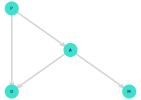

In [16]:
drawdag(g, [1, 0, 2, 0], [1, 2, 2, 0])

In [17]:
implied_conditional_independencies_min(g)

2-element Vector{ConditionalIndependence}:
 ConditionalIndependence(:D, :M, [:A])
 ConditionalIndependence(:M, :P, [:A])

Ok, let's check the second independence, marriage rate is independent on mormons percent conditioned on age at marriage

To do that, we have to build a model predicting M from P and A

### Predict M from P

Result: negative correlation between marriage rate and mormon percent. But checking the chart, looks like there are to cluster of data - with more than 2% of mormons and lower than 2%

In [18]:
@model function model_M_from_P(P, M)
    a ~ Normal(0, 1)
    pP ~ Normal(0, 1)
    μ = @. a + pP*P
    σ ~ Exponential()
    M ~ MvNormal(μ, σ)
end

m5m3_1 = sample(model_M_from_P(d.P, d.M), NUTS(), 1000)
display(m5m3_1)
m5m3_1 = DataFrame(m5m3_1)
precis(m5m3_1)

Chains MCMC chain (1000×15×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 3.74 seconds
Compute duration  = 3.74 seconds
parameters        = a, pP, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a   -0.0049    0.1366     0.0043    0.0033   1201.5114    1.0008    ⋯
          pP   -0.2287    0.1461     0.0046    0.0029   1691.1257    0.9995    ⋯
           σ    1.0015    0.1075     0.0034    0.0026   1405.0583    0.9993    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%   

┌───────┬─────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%    histogram │
├───────┼─────────────────────────────────────────────────────────┤
│     a │ -0.0049  0.1366  -0.2187  -0.0028   0.2058    ▁▁▂▆██▆▂▁ │
│    pP │ -0.2287  0.1461  -0.4547  -0.2293  -0.0006  ▁▁▁▃███▅▂▁▁ │
│     σ │  1.0015  0.1075    0.848   0.9933   1.1911   ▁▁▄█▇▃▁▁▁▁ │
└───────┴─────────────────────────────────────────────────────────┘


In [19]:
seq_p = range(extrema(d.P)...; length=30)
μ = StatisticalRethinking.link(m5m3_1, [:a, :pP], seq_p)
μ = hcat(μ...)
μ_mean = mean.(eachcol(μ));

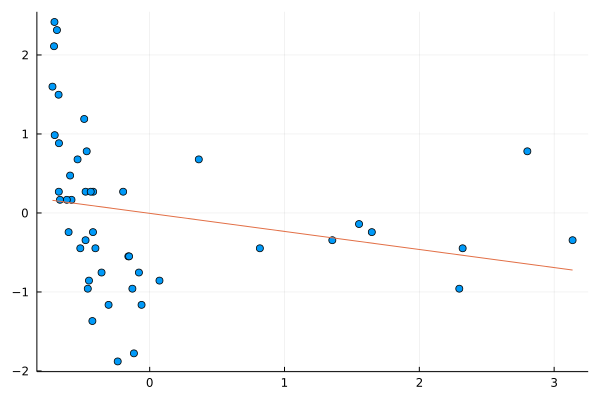

In [20]:
scatter(d.P, d.M)
plot!(seq_p, μ_mean)

### Predict M from P and A

To check that our graph makes sense. If they are independent, coefficient on P will be small

In [21]:
@model function model_M_from_PA(P, A, M)
    a ~ Normal()
    pA ~ Normal()
    pP ~ Normal()
    μ = @. a + pA*A + pP*P
    σ ~ Exponential()
    M ~ MvNormal(μ, σ)
end

m5m3_2 = sample(model_M_from_PA(d.P, d.A, d.M), NUTS(), 1000)
display(m5m3_2)
m5m3_2 = DataFrame(m5m3_2)
precis(m5m3_2)

Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.2 seconds
Compute duration  = 4.2 seconds
parameters        = a, pP, σ, pA
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a    0.0032    0.1124     0.0036    0.0029   1237.8552    0.9990    ⋯
          pA   -0.6865    0.1327     0.0042    0.0042    714.5645    0.9994    ⋯
          pP    0.0635    0.1289     0.0041    0.0030    969.5364    0.9990    ⋯
           σ    0.7730    0.0848     0.0027    0.0025   1070.7474    0.9993    ⋯
                                                                

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%      histogram │
├───────┼───────────────────────────────────────────────────────────┤
│     a │  0.0032  0.1124  -0.1746   0.0061   0.1785       ▁▁▄▇█▄▁▁ │
│    pA │ -0.6865  0.1327  -0.9076  -0.6812  -0.4809     ▁▂▄▇█▆▂▁▁▁ │
│    pP │  0.0635  0.1289  -0.1391   0.0582   0.2644    ▁▁▁▂▆█▇▃▁▁▁ │
│     σ │   0.773  0.0848   0.6513   0.7685   0.9118  ▁▂▆███▄▂▁▁▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


### Model for two classes: less than 2% mormons and higher that 2%

Looks like mormon percentage doesn't influence marriage rate directly only for states where this percentage is higher than 2%

In [22]:
@model function model_M_from_P_2classes(P, class_idx, M)
    a ~ MvNormal([0,0], 1)
    pP ~ MvNormal([0,0], 1)
    μ = @. a[class_idx] + pP[class_idx]*P
    σ ~ Exponential()
    M ~ MvNormal(μ, σ)
end

class_idx = ifelse.(d_join.perc_mormon .< 0.02, 1, 2)
m5m3_3 = sample(model_M_from_P_2classes(d.P, class_idx, d.M), NUTS(), 1000)
display(m5m3_3)
m5m3_3 = DataFrame(m5m3_3)
rename!(c -> replace(c, r"\[|\]" => ""), m5m3_3)
precis(m5m3_3)

Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.14 seconds
Compute duration  = 4.14 seconds
parameters        = pP[2], pP[1], σ, a[1], a[2]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

        a[1]   -0.6825    0.2433     0.0077    0.0089   677.6213    0.9990     ⋯
        a[2]   -0.3425    0.6006     0.0190    0.0185   708.7063    0.9992     ⋯
       pP[1]   -1.7931    0.4853     0.0153    0.0190   629.3127    0.9995     ⋯
       pP[2]    0.0514    0.2931     0.0093    0.0100   685.6462    0.9990     ⋯
           σ    0.8651    0.0889     0.0028    

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%      histogram │
├───────┼───────────────────────────────────────────────────────────┤
│    a1 │ -0.6825  0.2433  -1.0662  -0.6852    -0.29      ▁▁▂▆█▇▂▁▁ │
│    a2 │ -0.3425  0.6006  -1.3425  -0.3365   0.5939     ▁▁▃▇█▆▂▁▁▁ │
│   pP1 │ -1.7931  0.4853  -2.5341     -1.8  -0.9763        ▁▂▆█▄▁▁ │
│   pP2 │  0.0514  0.2931   -0.413   0.0477   0.4945    ▁▁▁▂▄▇█▆▃▁▁ │
│     σ │  0.8651  0.0889   0.7299   0.8584   1.0147  ▁▁▃▆██▆▄▃▁▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


In [23]:
seq_p1 = range(extrema(d.P[class_idx .== 1])...; length=30)
seq_p2 = range(extrema(d.P[class_idx .== 2])...; length=30)
μ1 = StatisticalRethinking.link(m5m3_3, [:a1, :pP1], seq_p1)
μ2 = StatisticalRethinking.link(m5m3_3, [:a2, :pP2], seq_p2)
μ1 = hcat(μ1...)
μ1_mean = mean.(eachcol(μ1));
μ2 = hcat(μ2...)
μ2_mean = mean.(eachcol(μ2));

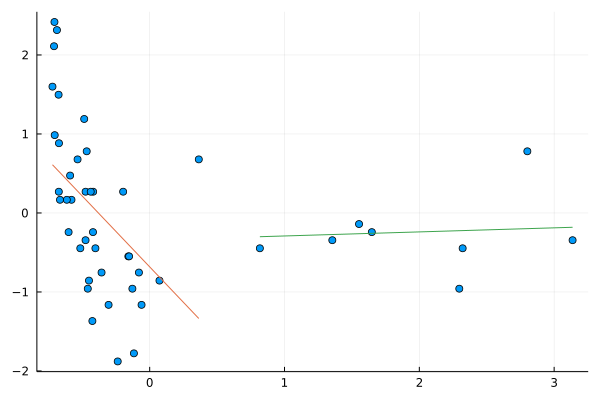

In [24]:
scatter(d.P, d.M)
plot!(seq_p1, μ1_mean)
plot!(seq_p2, μ2_mean)

### Unified model predict D from P A M

In [25]:
@model function model_D_from_P(P, D)
    a ~ Normal(0, 0.2)
    pP ~ Normal(0, 0.5)
    μ = @. a + pP*P
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_P(d.P, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×15×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.37 seconds
Compute duration  = 2.37 seconds
parameters        = a, pP, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a   -0.0029    0.1194     0.0038    0.0029   1313.3617    0.9999    ⋯
          pP    0.1522    0.1348     0.0043    0.0041   1192.9867    1.0003    ⋯
           σ    1.0077    0.1089     0.0034    0.0044   1006.9795    1.0013    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%   

┌───────┬──────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%  histogram │
├───────┼──────────────────────────────────────────────────────┤
│     a │ -0.0029  0.1194  -0.1955  -0.0046  0.1832   ▁▂▅██▅▁▁ │
│    pP │  0.1522  0.1348  -0.0717   0.1563  0.3672  ▁▁▃▆█▇▃▁▁ │
│     σ │  1.0077  0.1089   0.8441   0.9999   1.194   ▁▄██▄▂▁▁ │
└───────┴──────────────────────────────────────────────────────┘


In [26]:
seq_p = range(extrema(d.P)...; length=30)
μ = StatisticalRethinking.link(m5m3_4, [:a, :pP], seq_p)
μ = hcat(μ...)
μ_mean = mean.(eachcol(μ));
μ_PI = PI.(eachcol(μ))
μ_PI = vcat(μ_PI'...);
sim = StatisticalRethinking.simulate(m5m3_4, [:a, :pP, :σ], seq_p)
sim_PI = PI.(eachcol(sim))
sim_PI = vcat(sim_PI'...);

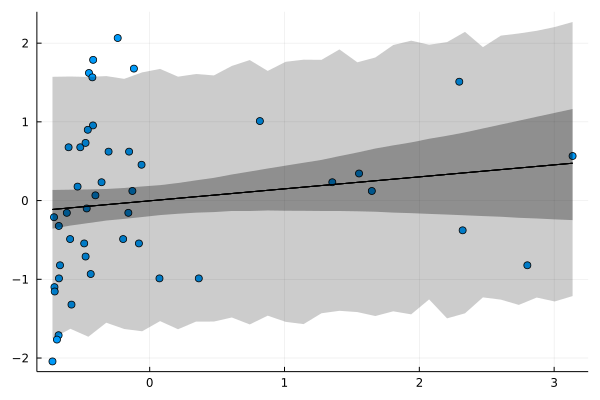

In [27]:
scatter(d.P, d.D)
plot!(seq_p, [μ_mean μ_mean]; fillrange=μ_PI, c=:black, fillalpha=0.3)
plot!(seq_p, [μ_mean μ_mean]; fillrange=sim_PI, c=:black, fillalpha=0.2)

In [28]:
@model function model_D_from_PA(P, A, D)
    a ~ Normal(0, 1)
    pP ~ Normal(0, 1)
    pA ~ Normal(0, 1)
    μ = @. a + pP*P + pA*A
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_PA(d.P, d.A, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.22 seconds
Compute duration  = 4.22 seconds
parameters        = a, pP, σ, pA
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

           a    0.0011    0.1340     0.0042    0.0044   966.9262    1.0013     ⋯
          pP   -0.0229    0.1532     0.0048    0.0060   757.9331    0.9993     ⋯
          pA    0.4662    0.1547     0.0049    0.0064   615.8479    1.0002     ⋯
           σ    0.9206    0.1010     0.0032    0.0043   637.0906    0.9990     ⋯
                                                              

┌───────┬────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%   94.5%    histogram │
├───────┼────────────────────────────────────────────────────────┤
│     a │  0.0011   0.134   -0.218   0.0085  0.2099  ▁▁▁▂▅▇█▅▂▁▁ │
│    pA │  0.4662  0.1547    0.209   0.4745  0.7078   ▁▂▃▅█▇▄▂▁▁ │
│    pP │ -0.0229  0.1532  -0.2636  -0.0191  0.2155  ▁▁▁▃▆██▅▂▁▁ │
│     σ │  0.9206   0.101   0.7698    0.913  1.0948     ▁▃██▄▂▁▁ │
└───────┴────────────────────────────────────────────────────────┘


In [29]:
@model function model_D_from_PM(P, M, D)
    a ~ Normal(0, 1)
    pP ~ Normal(0, 1)
    pM ~ Normal(0, 1)
    μ = @. a + pP*P + pM*M
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_PM(d.P, d.M, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.66 seconds
Compute duration  = 4.66 seconds
parameters        = a, pP, pM, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a   -0.0045    0.1024     0.0032    0.0041   1016.2662    1.0013    ⋯
          pP    0.0039    0.1130     0.0036    0.0033   1135.2256    0.9993    ⋯
          pM   -0.7149    0.1156     0.0037    0.0037   1108.5564    0.9995    ⋯
           σ    0.7216    0.0772     0.0024    0.0019   1387.0109    1.0011    ⋯
                                                              

┌───────┬────────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%       histogram │
├───────┼────────────────────────────────────────────────────────────┤
│     a │ -0.0045  0.1024  -0.1715  -0.0013   0.1517  ▁▁▁▃▅▇██▇▅▂▁▁▁ │
│    pM │ -0.7149  0.1156  -0.8972  -0.7177  -0.5217        ▁▂▅█▇▄▁▁ │
│    pP │  0.0039   0.113  -0.1713   0.0054   0.1781        ▁▁▄██▅▁▁ │
│     σ │  0.7216  0.0772     0.61    0.717   0.8522     ▁▂▄██▆▃▂▁▁▁ │
└───────┴────────────────────────────────────────────────────────────┘


In [30]:
@model function model_D_from_PMA(P, M, A, D)
    a ~ Normal(0, 0.5)
    pP ~ Normal(0, 0.5)
    pM ~ Normal(0, 0.5)
    pA ~ Normal(0, 0.5)
    μ = @. a + pP*P + pM*M + pA*A
    σ ~ Exponential()
    D ~ MvNormal(μ, σ)
end

m5m3_4_chain = sample(model_D_from_PMA(d.P, d.M, d.A, d.D), NUTS(), 1000)
display(m5m3_4_chain)
m5m3_4 = DataFrame(m5m3_4_chain)
precis(m5m3_4)

Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 5.11 seconds
Compute duration  = 5.11 seconds
parameters        = a, pP, pM, σ, pA
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           a    0.0038    0.1118     0.0035    0.0040    873.3004    1.0036    ⋯
          pP    0.0149    0.1122     0.0035    0.0040   1079.8646    1.0002    ⋯
          pM   -0.6864    0.1385     0.0044    0.0037   1035.6535    0.9991    ⋯
          pA   -0.0005    0.1497     0.0047    0.0044   1008.2329    0.9991    ⋯
           σ    0.7320    0.0854     0.0027    0.0028    7

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%      histogram │
├───────┼───────────────────────────────────────────────────────────┤
│     a │  0.0038  0.1118  -0.1771   0.0061   0.1819       ▁▁▄██▅▁▁ │
│    pA │ -0.0005  0.1497  -0.2386  -0.0054    0.231    ▁▁▁▂▅██▆▂▁▁ │
│    pM │ -0.6864  0.1385  -0.9058  -0.6861  -0.4604   ▁▁▁▂▅██▅▂▁▁▁ │
│    pP │  0.0149  0.1122  -0.1606   0.0115   0.2013       ▁▁▄██▅▂▁ │
│     σ │   0.732  0.0854   0.6152   0.7223    0.878  ▁▂▅██▇▄▂▁▁▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


## 5M5

For that problem we need two extra data pieces:

* amount of restaurants visits
* amount of non-car transportation for population (walking, byking, etc)

By regressing those variables into model we might find the factors influencing obesity and gasoline price

# Hard problems

## 5H1

In [31]:
g = Dagitty.DAG(:M => :A, :A => :D)

DAG: {3, 2} directed simple Int64 graph with labels [:A, :D, :M])


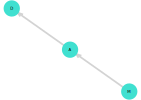

In [32]:
drawdag(g)

In [33]:
implied_conditional_independencies(g)

1-element Vector{ConditionalIndependence}:
 ConditionalIndependence(:D, :M, [:A])

To check it, we first check M -> A influence (it should be high)
Then we check M, A -> D. It should have high A coefficient, but low M.

In [34]:
d = DataFrame(CSV.File("../data/WaffleDivorce.csv"))
d[!,:D] = standardize(ZScoreTransform, d.Divorce)
d[!,:M] = standardize(ZScoreTransform, d.Marriage)
d[!,:A] = standardize(ZScoreTransform, d.MedianAgeMarriage);

### Check M -> A model

In [35]:
@model function m5h1_ma(M, A)
    σ ~ Exponential(1)
    a ~ Normal(0, 0.2)
    bM ~ Normal(0, 0.5)
    μ = @. a + bM * M
    A ~ MvNormal(μ, σ)
end

m5h1_1_ch = sample(m5h1_ma(d.M, d.A), NUTS(), 1000)
m5h1_1 = DataFrame(m5h1_1_ch)
precis(m5h1_1)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%       histogram │
├───────┼────────────────────────────────────────────────────────────┤
│     a │  0.0021  0.0933  -0.1477   0.0036    0.146   ▁▁▂▄▇██▇▅▂▁▁▁ │
│    bM │ -0.6936  0.0995  -0.8542  -0.6894  -0.5306  ▁▁▂▃▅▇█▆▃▂▁▁▁▁ │
│     σ │  0.7139  0.0738   0.6047   0.7058   0.8447      ▁▂▅██▅▃▂▁▁ │
└───────┴────────────────────────────────────────────────────────────┘


### Check M, A -> D model

In [36]:
@model function m5h1_mad(M, A, D)
    σ ~ Exponential(1)
    a ~ Normal(0, 0.2)
    bM ~ Normal(0, 0.5)
    bA ~ Normal(0, 0.5)
    μ = @. a + bM*M + bA*A
    D ~ MvNormal(μ, σ)
end

m5h1_2_ch = sample(m5h1_mad(d.M, d.A, d.D), NUTS(), 1000)
m5h1_2 = DataFrame(m5h1_2_ch)
precis(m5h1_2)

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%      histogram │
├───────┼───────────────────────────────────────────────────────────┤
│     a │ -0.0004  0.0966  -0.1482   0.0035   0.1493       ▁▁▁▃▇█▃▁ │
│    bA │ -0.6109  0.1563  -0.8652   -0.605  -0.3627   ▁▁▁▃▅██▅▂▁▁▁ │
│    bM │ -0.0603  0.1578  -0.3168  -0.0628    0.192    ▁▁▂▄███▄▂▁▁ │
│     σ │  0.8237  0.0859   0.7044   0.8154   0.9699  ▁▂▆▇█▆▄▂▁▁▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


Ok, looks like modelling result is consistent with this DAG, as after adding A to the model, effect of the M become very small

## 5H2

To make a counterfactual plots for M -> A -> D model, we need:
* fit the model for M -> A and model for A -> D
* take the mean marriage rate, half it and calculate A and D predictions using the model


In [37]:
@model function model_m5h2(M, A, D)
    aM ~ Normal(0, 0.2)
    bM ~ Normal(0, 0.5)
    mu_A = @. aM + bM*M 
    σ_A ~ Exponential(1)
    A ~ MvNormal(mu_A, σ_A)
    
    aA ~ Normal(0, 0.2)
    bA ~ Normal(0, 0.5)
    mu_D = @. aA + bA*A
    σ_D ~ Exponential(1)
    D ~ MvNormal(mu_D, σ_D)
end

m5h2_ch = sample(model_m5h2(d.M, d.A, d.D), NUTS(), 1000)
m5h2 = DataFrame(m5h2_ch)
precis(m5h2)

┌───────┬───────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%      histogram │
├───────┼───────────────────────────────────────────────────────────┤
│    aA │  0.0043  0.1019  -0.1483   0.0047   0.1646       ▁▁▄██▄▁▁ │
│    aM │ -0.0004  0.0923  -0.1425   0.0002   0.1495  ▁▁▁▂▄▆██▆▃▂▁▁ │
│    bA │ -0.5616  0.1176  -0.7547  -0.5598  -0.3726      ▁▁▃▆█▆▂▁▁ │
│    bM │ -0.6899  0.1007  -0.8502  -0.6896  -0.5257  ▁▁▂▄▆▇█▇▄▂▂▁▁ │
│   σ_A │  0.7116  0.0762   0.6027   0.7055   0.8414     ▁▂▅██▆▃▂▁▁ │
│   σ_D │  0.8231  0.0933   0.6924   0.8145   0.9775      ▁▂██▄▁▁▁▁ │
└───────┴───────────────────────────────────────────────────────────┘


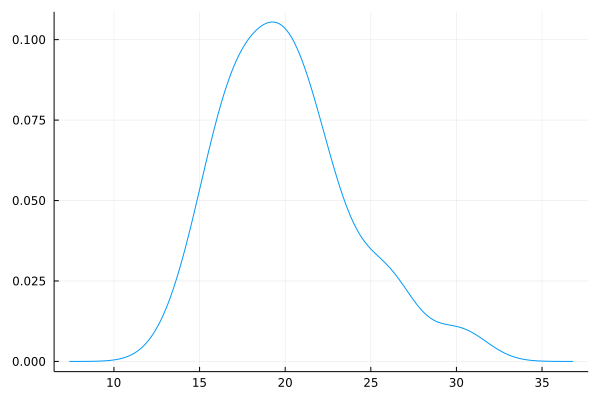

In [43]:
density(d.Marriage)

In [48]:
mean_orig_M = mean(d.Marriage)
sim_M = ([mean_orig_M, mean_orig_M/2] .- mean(d.Marriage)) ./ std(d.Marriage)

2-element Vector{Float64}:
  0.0
 -2.6480385477660056

In [59]:
sim_A, sim_D = [], []

for r ∈ eachrow(m5h2)
    μ_A = @. r.aM + r.bM * sim_M
    A = rand(MvNormal(μ_A, r.σ_A))
    μ_D = @. r.aA + r.bA * A
    D = rand(MvNormal(μ_D, r.σ_D))
    push!(sim_A, A)
    push!(sim_D, D)
end

sim_A = vcat(sim_A'...)
sim_D = vcat(sim_D'...);

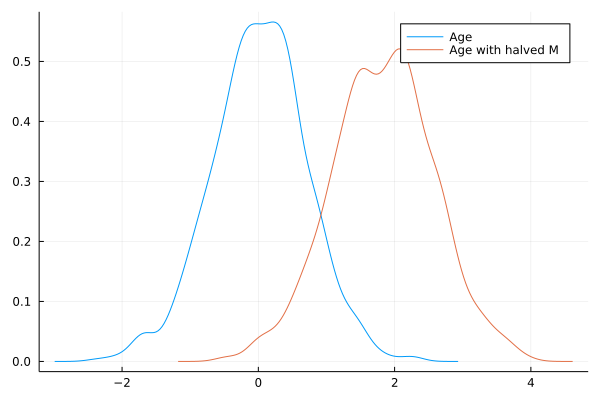

In [63]:
density(sim_A[:,1]; label="Age")
density!(sim_A[:,2]; label="Age with halved M")

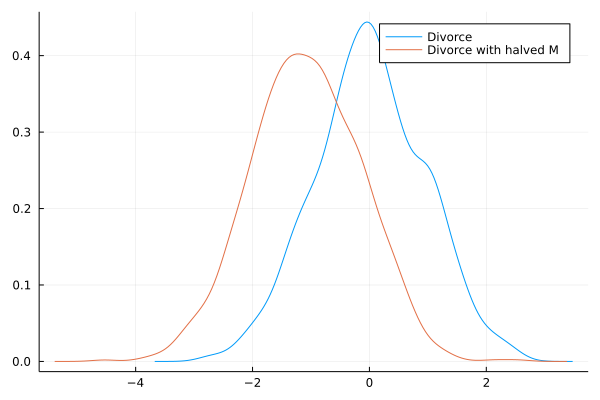

In [64]:
density(sim_D[:,1]; label="Divorce")
density!(sim_D[:,2]; label="Divorce with halved M")

## 5H3

In [66]:
d = DataFrame(CSV.File("../data/milk.csv",  missingstring="NA"))
rename!(n -> replace(n, "." => "_"), d)

d = disallowmissing(d[completecases(d[!,[:kcal_per_g,:neocortex_perc,:mass]]),:])

d[!,:K] = standardize(ZScoreTransform, d.kcal_per_g)
d[!,:M] = standardize(ZScoreTransform, log.(d.mass))
d[!,:N] = standardize(ZScoreTransform, d.neocortex_perc);

In [79]:
@model function model_m5h3(N, M, K)
    # M -> K <- N
    aK ~ Normal(0, 0.2)
    bN ~ Normal(0, 0.5)
    bM ~ Normal(0, 0.5)
    μ_K = @. aK + bN * N + bM * M
    σ_K ~ Exponential(1)
    K ~ MvNormal(μ_K, σ_K)
    
    # M -> N
    aN ~ Normal(0, 0.2)
    bMN ~ Normal(0, 0.5)
    μ_N = @. aN + bMN * M
    σ_N ~ Exponential(1)
    N ~ MvNormal(μ_N, σ_N)
end

m5h3_ch = sample(model_m5h3(d.N, d.M, d.K), NUTS(), 1000)
m5h3 = DataFrame(m5h3_ch)
precis(m5h3)

┌───────┬────────────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%      50%    94.5%       histogram │
├───────┼────────────────────────────────────────────────────────────┤
│    aK │  0.0047  0.1495  -0.2417   0.0006   0.2535      ▁▁▃▅██▅▃▁▁ │
│    aN │  0.0016  0.1309  -0.2061  -0.0016   0.2075      ▁▁▁▂▄██▅▂▁ │
│    bM │ -0.6695  0.2689  -1.0853  -0.6836  -0.2357      ▁▁▃▆█▇▄▁▁▁ │
│   bMN │   0.656  0.1698   0.3853    0.662    0.904  ▁▁▁▂▄▇██▅▂▁▁▁▁ │
│    bN │  0.5638  0.2626   0.1348   0.5684   0.9578     ▁▁▁▁▂▆██▅▁▁ │
│   σ_K │  0.8179  0.1802   0.5914   0.7859   1.1404      ▂█▆▂▁▁▁▁▁▁ │
│   σ_N │   0.719  0.1357   0.5399   0.7047   0.9634      ▁▅██▅▂▁▁▁▁ │
└───────┴────────────────────────────────────────────────────────────┘


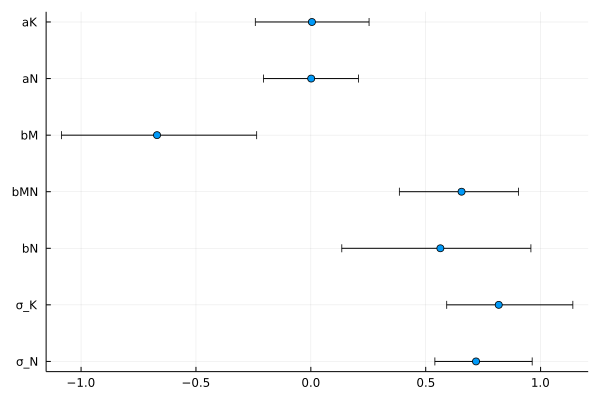

In [80]:
coeftab_plot(m5h3)

In [84]:
mean_orig_M = mean(d.mass)
sim_M = ([mean_orig_M, mean_orig_M*2] .- mean(d.mass)) ./ std(d.mass)

2-element Vector{Float64}:
 0.0
 0.7055135250488053

In [85]:
sim_K, sim_N = [], []

for r ∈ eachrow(m5h3)
    # first simulate N
    μ_N = @. r.aN + r.bMN * sim_M
    N = rand(MvNormal(μ_N, r.σ_N))
    
    # then simulate K
    μ_K = @. r.aK + r.bN * N + r.bM * sim_M
    K = rand(MvNormal(μ_K, r.σ_K))
    push!(sim_K, K)
    push!(sim_N, N)
end

sim_K = vcat(sim_K'...)
sim_N = vcat(sim_N'...);

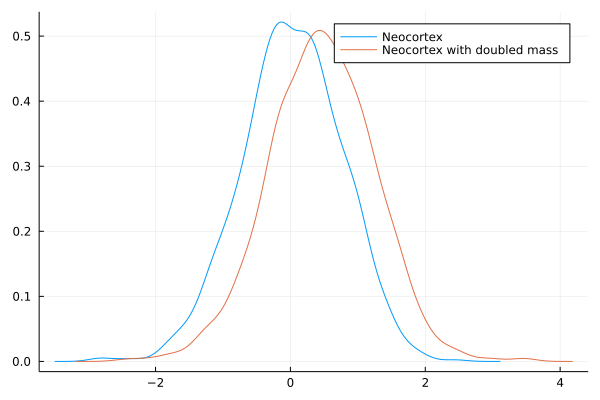

In [86]:
density(sim_N[:,1]; label="Neocortex")
density!(sim_N[:,2]; label="Neocortex with doubled mass")

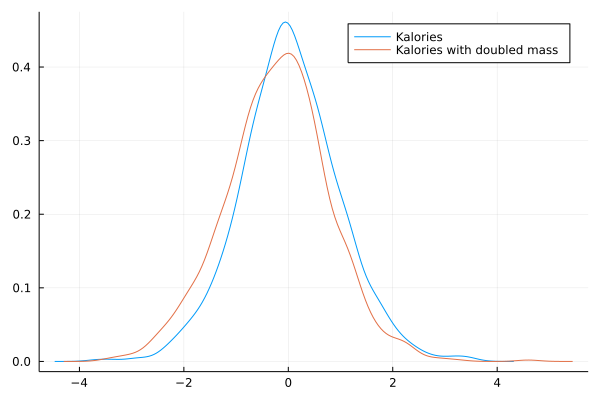

In [87]:
density(sim_K[:,1]; label="Kalories")
density!(sim_K[:,2]; label="Kalories with doubled mass")